# Part 0: Set-up

In [1]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.6 MB/s eta 0:00:00


In [2]:
pip install igviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-PS1-Yiyang/main/data/diabetes1.csv")
df

Title  \
0   Epidemiology of diabetes and diabetic complica...   
1   International Association of Diabetes and Preg...   
2   Prevalence of type 2 diabetes mellitus of Chin...   
3   Diabetes in China: a societal solution for a p...   
4   Diabetes in China: Epidemiology and Genetic Ri...   
5   Prevalence and Treatment of Diabetes in China,...   
6   Prevalence of Diabetes among Men and Women in ...   
7   Prevalence of Diabetes and Its Risk Factors in...   
8   The long-term effect of lifestyle intervention...   
9   Childhood Diabetes in China: Enormous variatio...   
10             Progress in diabetes research in China   
11  Frequency, Immunogenetics, and Clinical Charac...   
12  Determination of diabetic retinopathy prevalen...   
13  Prevalence of gestational diabetes mellitus in...   

                                             Abstract  
0   The People’s Republic of China (herein referre...  
1   Background The International Association of Di...  
2   This article reviews and describes trends and ...  
3   China has a large burden of diabetes: in 2013,...  
4   The incidence of type 2 diabetes (T2D) has rap...  
5   Importance  Recent data on prevalence, awarene...  
6   BACKGROUND\nBecause of the rapid change in lif...  
7   OBJECTIVE\nTo determine the prevalence of diab...  
8   Background\nIntensive lifestyle interventions ...  
9   OBJECTIVE\nTo investigate the incidence rate o...  
10  The prevalence of diabetes, especially Type 2 ...  
11  Adult non–insulin requiring diabetes includes ...  
12  Background\n\nThe prevalence of diabetic retin...  
13  Aims/Introduction\n\nPregnant women with gesta...

# Part I The World Cloud

## 1.1. Title

In [5]:
# Join the different processed titles together.
title = ','.join(list(df['Title'].values))
title

'Epidemiology of diabetes and diabetic complications in China,International Association of Diabetes and Pregnancy Study Group criteria is suitable for gestational diabetes mellitus diagnosis:further evidence from China,Prevalence of type 2 diabetes mellitus of Chinese populations in Mainland China, Hong Kong, and Taiwan,Diabetes in China: a societal solution for a personal challenge,Diabetes in China: Epidemiology and Genetic Risk Factors and Their Clinical Utility in Personalized Medication,Prevalence and Treatment of Diabetes in China, 2013-2018,Prevalence of Diabetes among Men and Women in China,Prevalence of Diabetes and Its Risk Factors in China, 1994,The long-term effect of lifestyle interventions to prevent diabetes in the China Da Qing Diabetes Prevention Study: a 20-year follow-up study,Childhood Diabetes in China: Enormous variation by place and ethnic group,Progress in diabetes research in China,Frequency, Immunogenetics, and Clinical Characteristics of Latent Autoimmune Dia

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
stop_words = stopwords.words('english')
stop_words.extend([',',"diabetes","china",":","A","on","in","into","the","for","review",])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

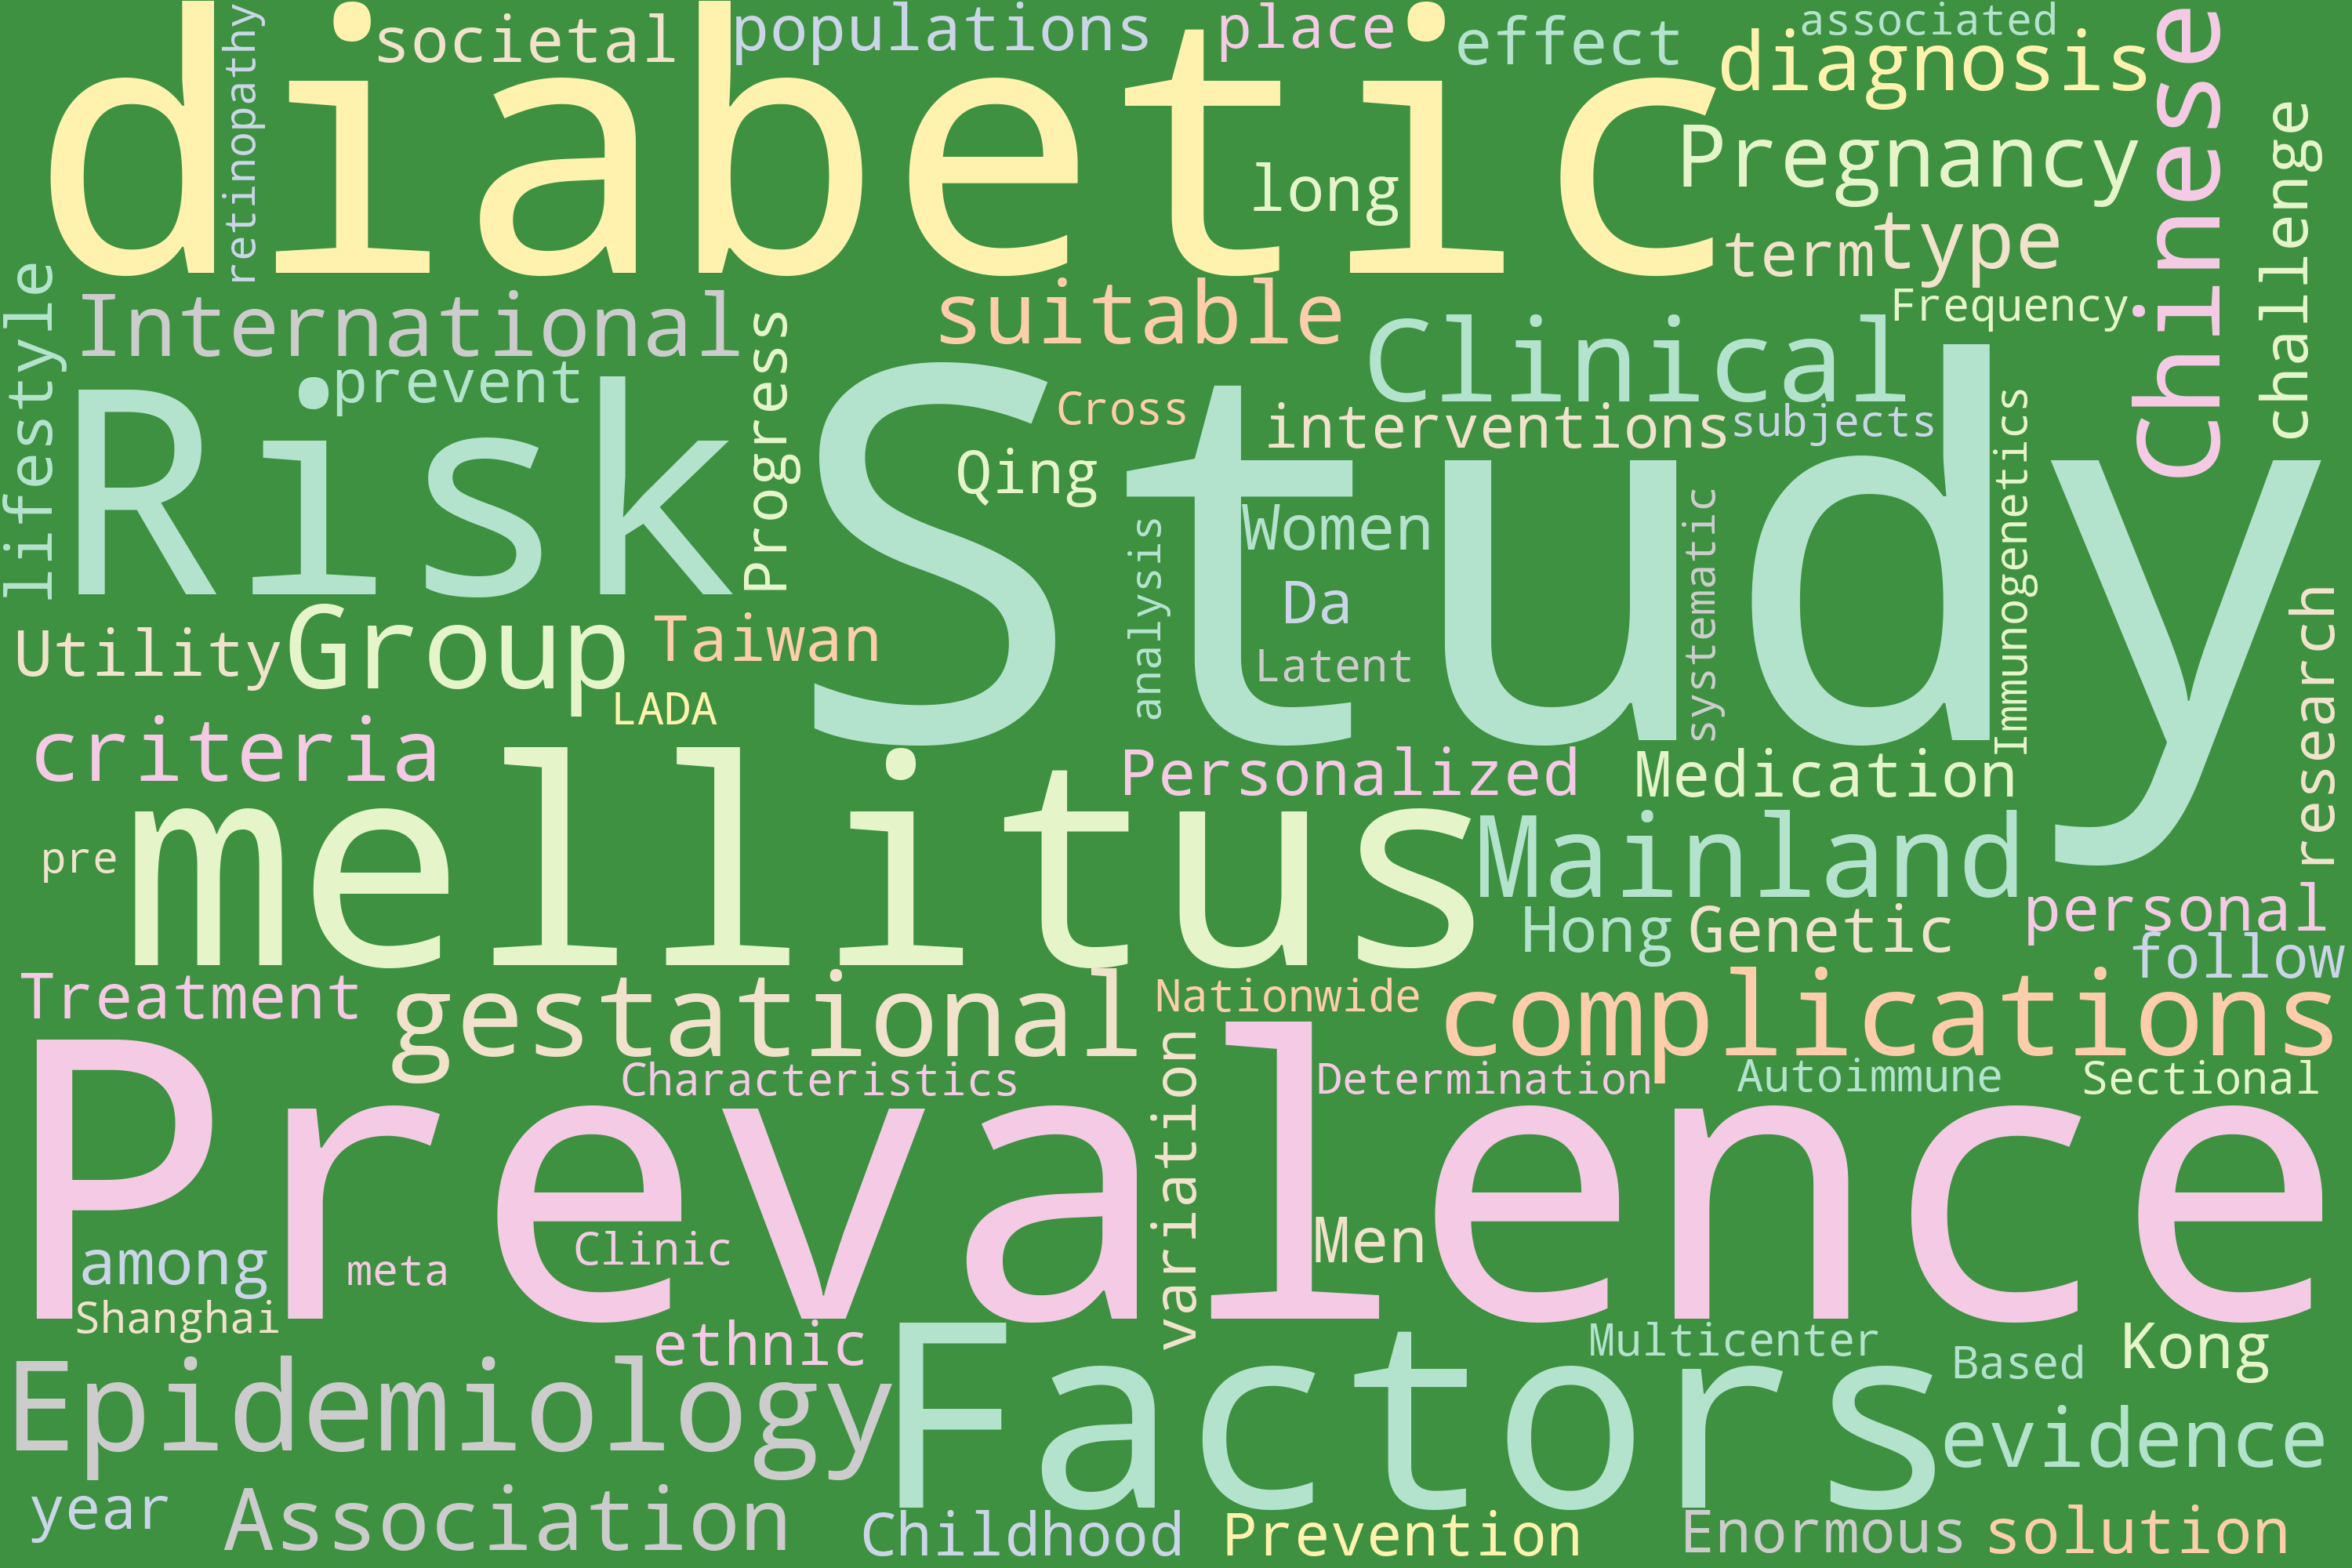

In [9]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# show the word cloud
wordcloud.to_image()

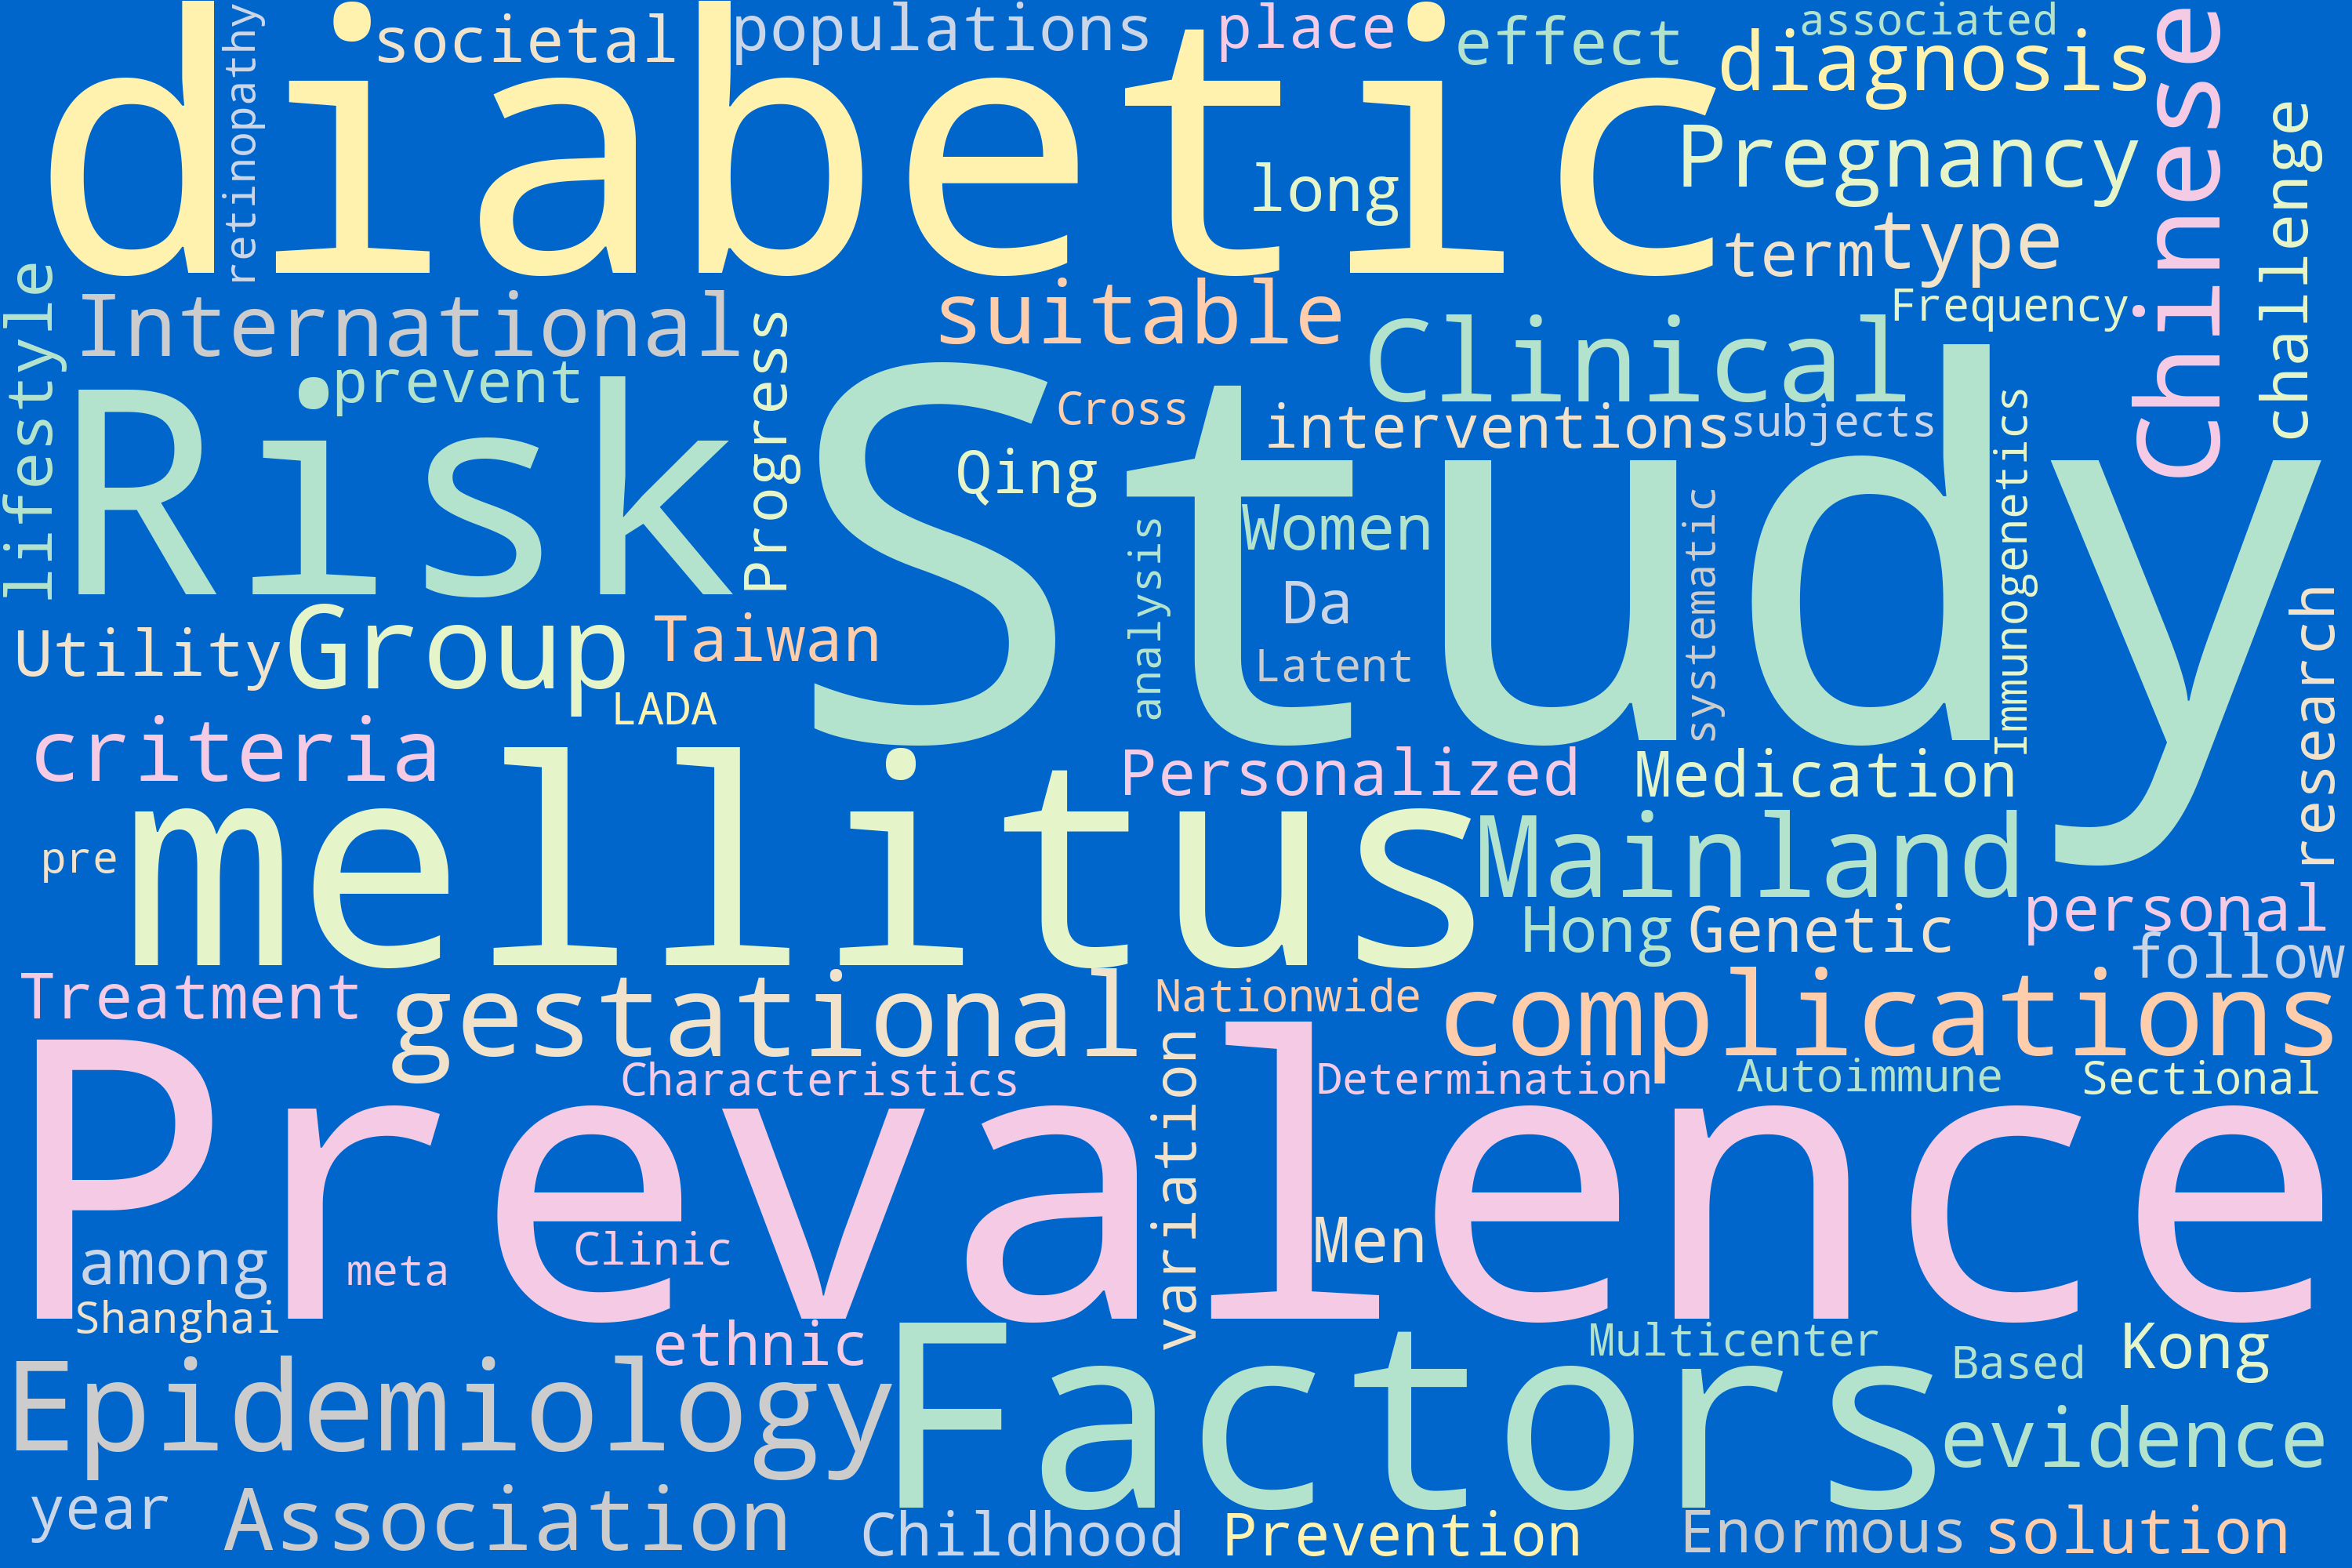

In [10]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(title)

# Show the word cloud
wordcloud.to_image()

## 1.2. Abstract

In [11]:
# Join the different processed titles together.
Abstract = ','.join(list(df['Abstract'].values))
Abstract

"The People’s Republic of China (herein referred to as China) has witnessed one of the most dramatic rises in diabetes prevalence anywhere in the world. The latest epidemiological study suggests that approximately 11% of the population has diabetes, with a significant proportion remaining undiagnosed. Risk factors for diabetes in the Chinese population are similar to those in other populations, though gestational diabetes and young-onset diabetes is becoming increasingly common. Data on the prevalence of diabetic complications remain limited, though cardio–renal complications account for significant morbidity and mortality. Other diabetes-related comorbidities are becoming increasingly common, with cancer emerging as a major cause of mortality among individuals with diabetes. There are many challenges and obstacles that impede effective diabetes prevention and the delivery of care, though much progress has occurred over recent years. Lessons learnt from how China has responded to the c

In [12]:
stop_words = stopwords.words('english')
stop_words.extend(['.'])
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

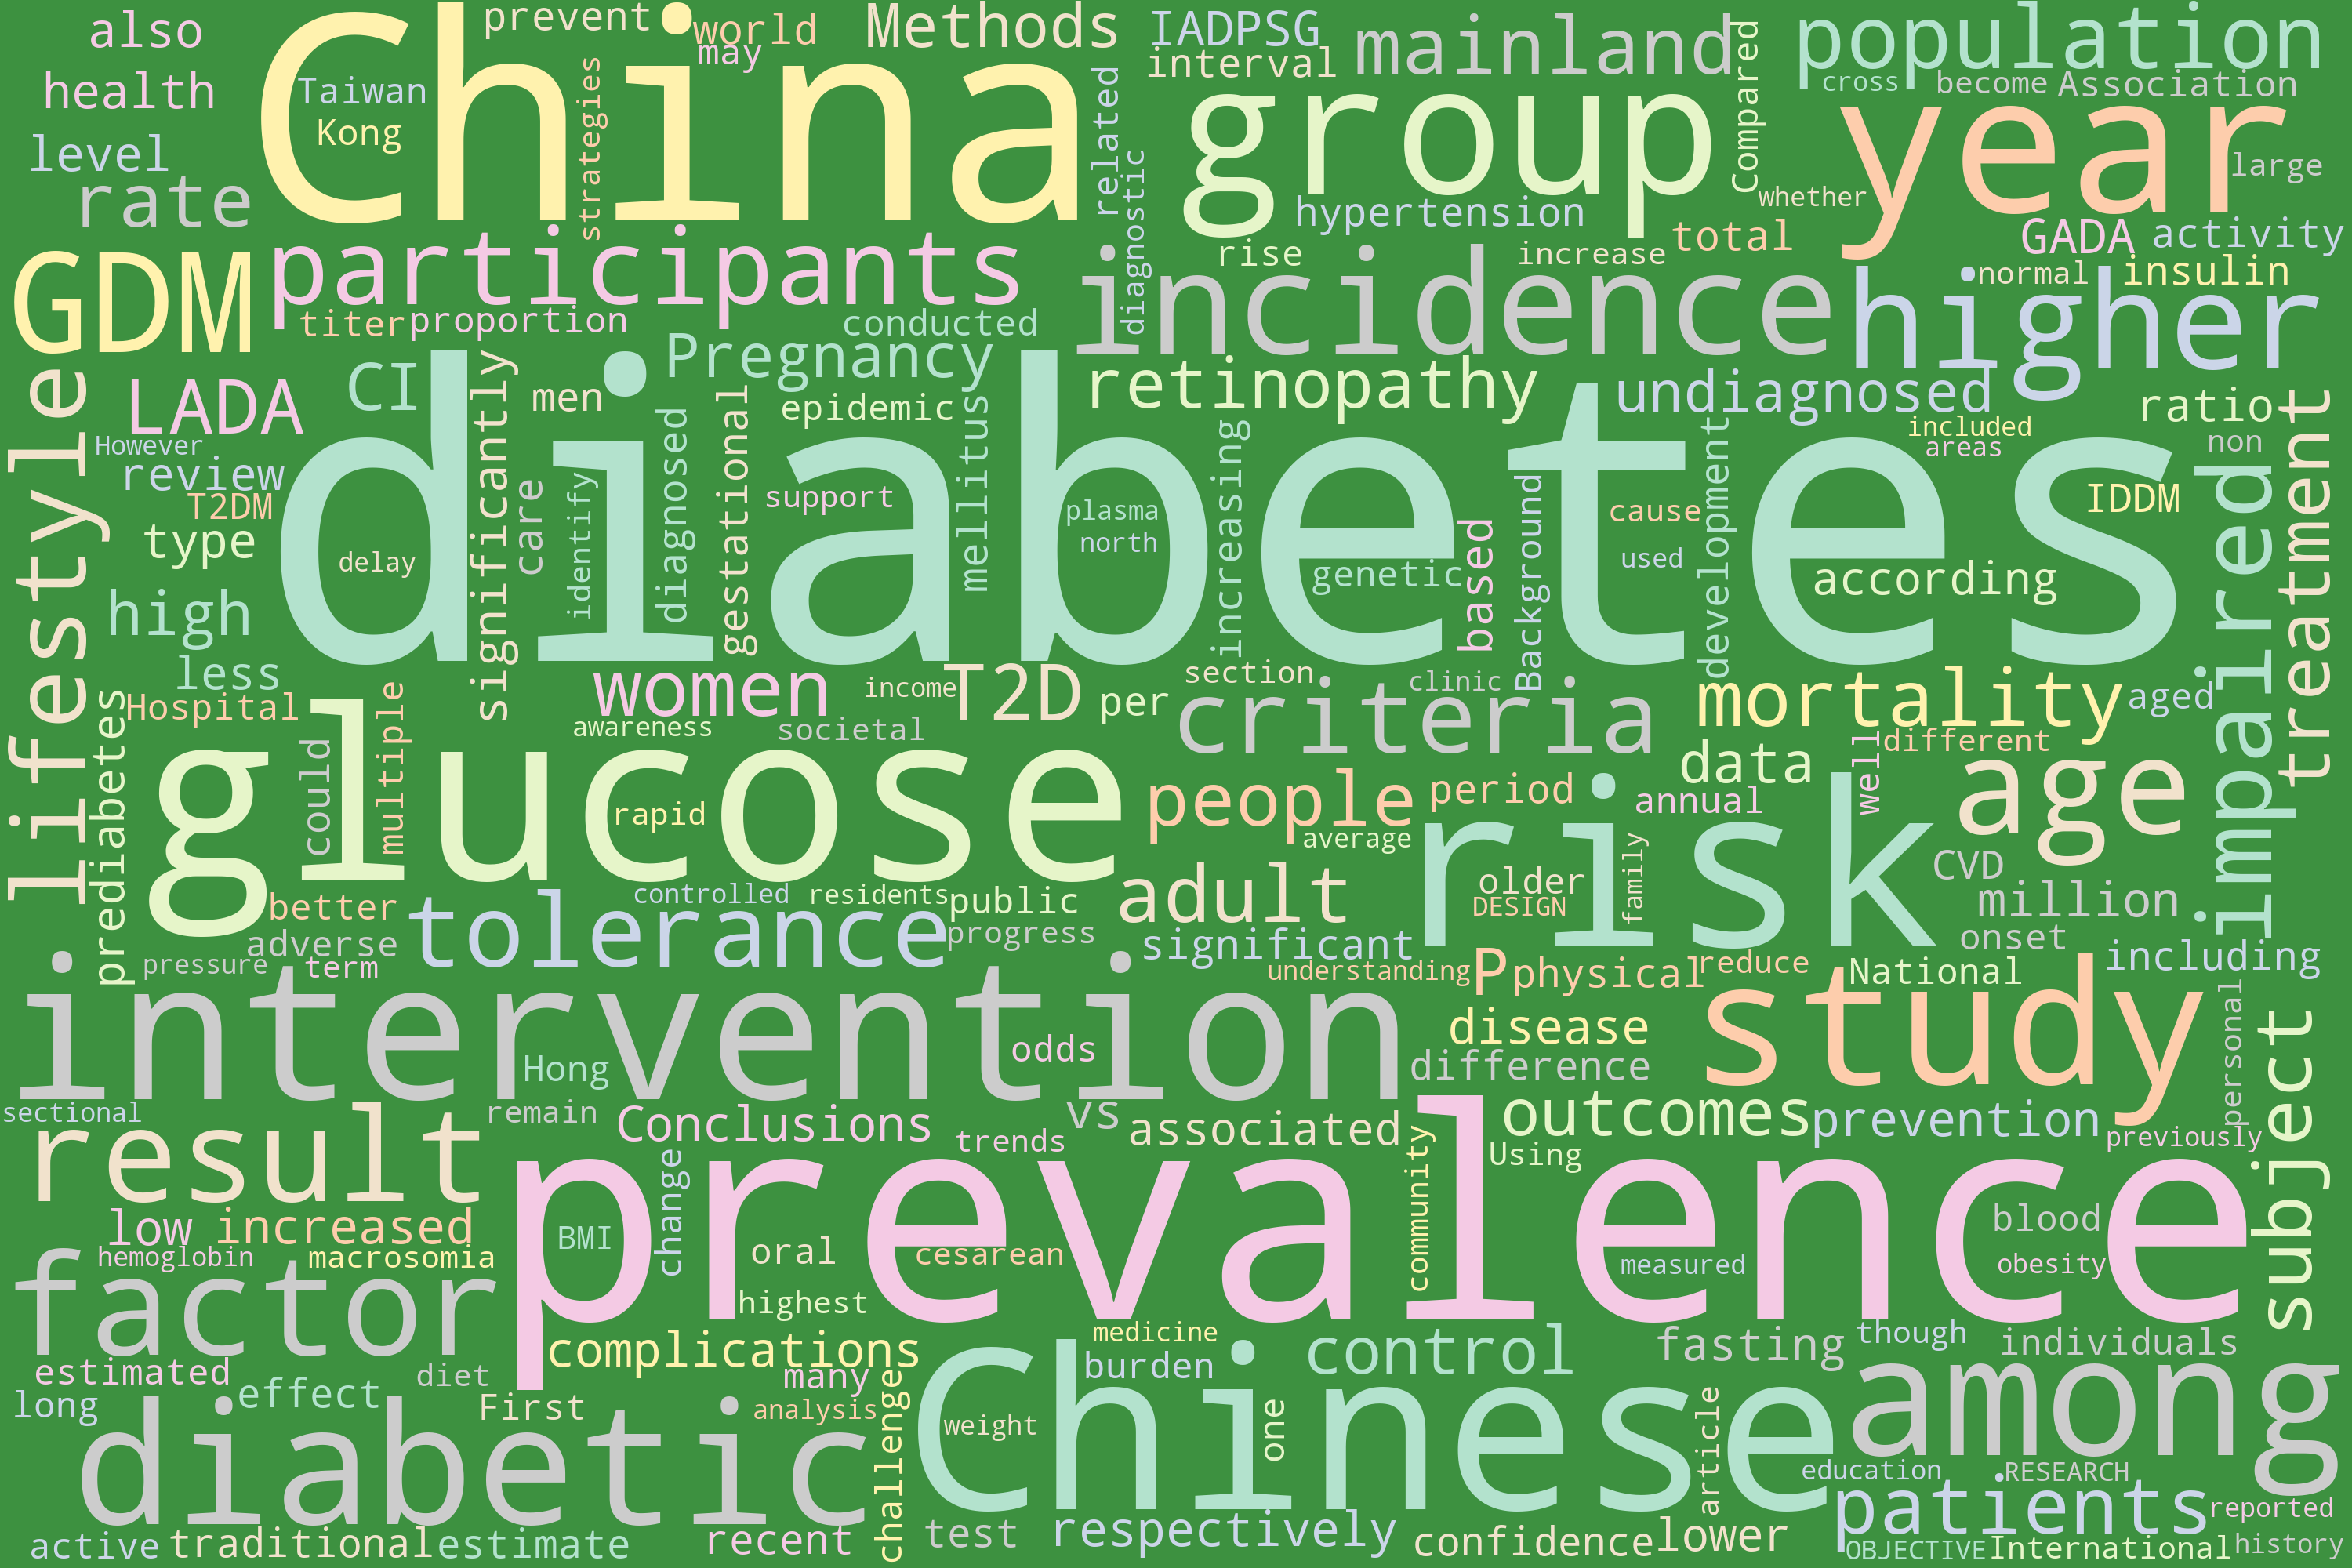

In [13]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#3D9140', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# show the word cloud
wordcloud.to_image()

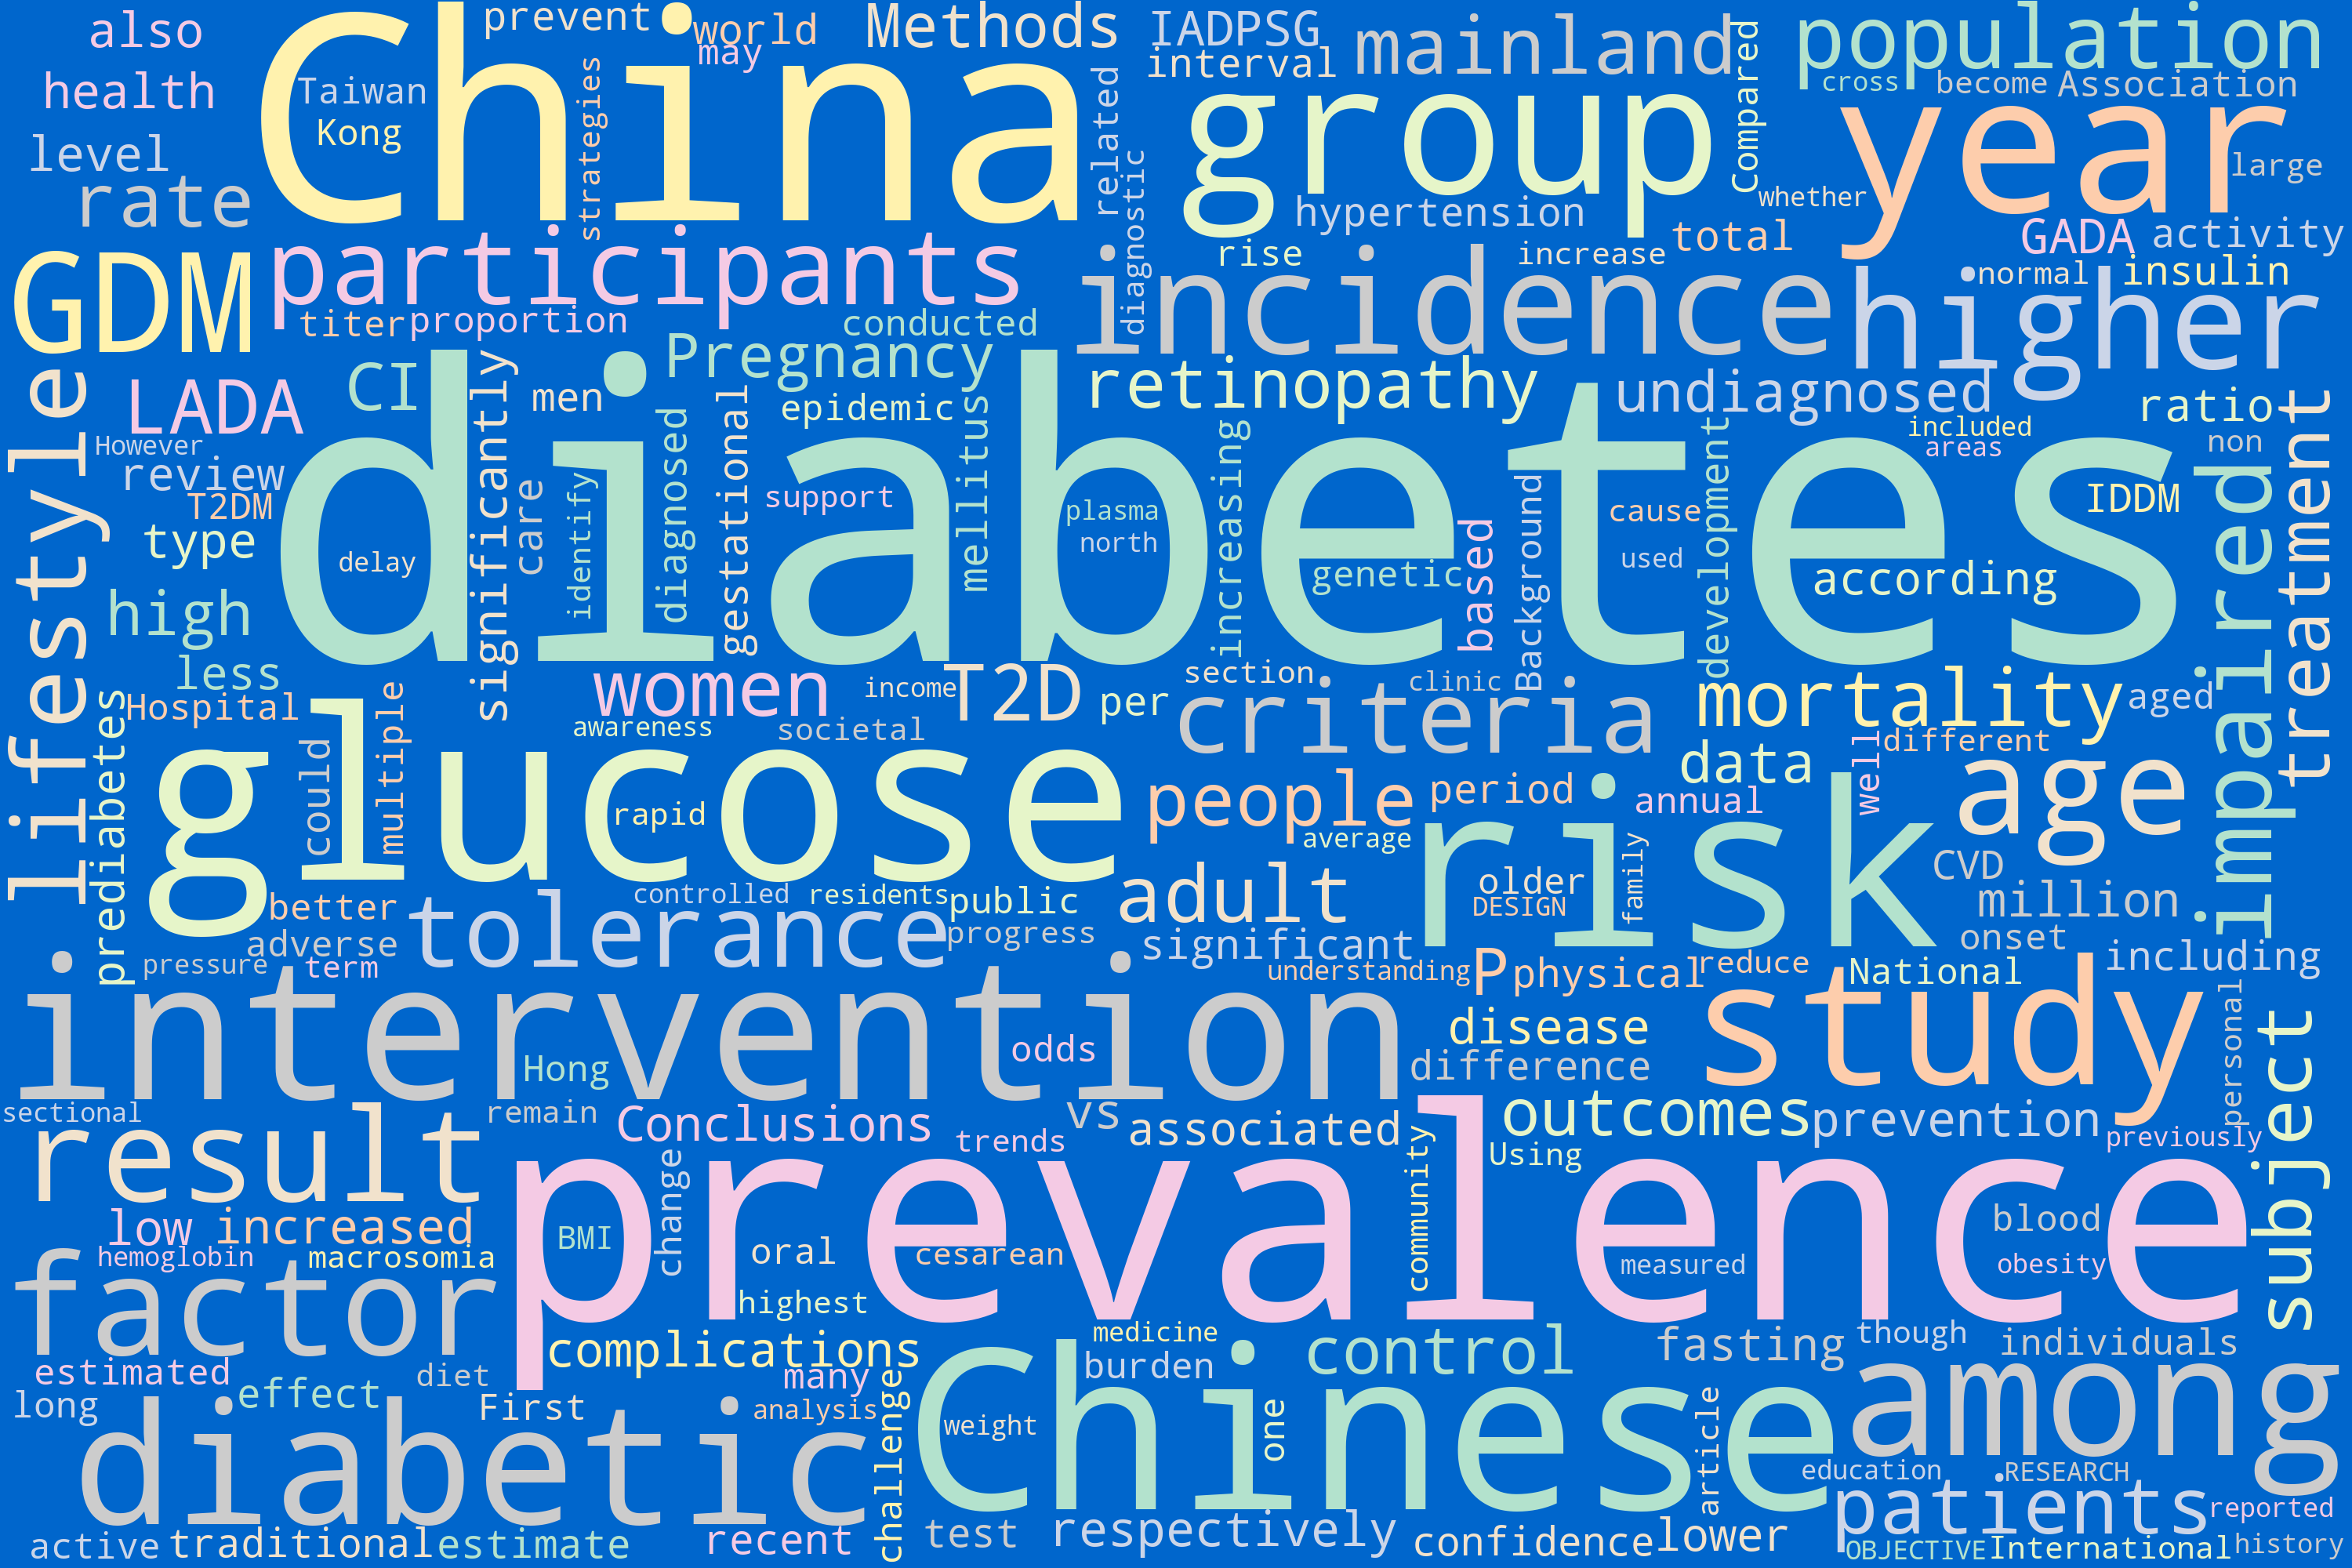

In [14]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='#0066CC', colormap='Pastel2', collocations=False, stopwords =stop_words).generate(Abstract)

# Show the word cloud
wordcloud.to_image()

# Part II Bigram

## 2.1. Title

In [15]:
df.columns

Index(['Title', 'Abstract'], dtype='object')

In [16]:
import regex
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
df_Title  = df['Title'].str.lower()

In [18]:
Titles = ('. '.join(list(df_Title.values)))
Titles = regex.sub(r'\b[0-9]+\b\W*', '', Titles)
Titles = regex.sub(r'(?:^| )\w(?:$| )', ' ', Titles)
Titles =Titles.replace(":"," ")
Titles =Titles.replace("."," ")
Titles =Titles.replace("?"," ")
Titles =Titles.replace("("," ")
Titles =Titles.replace(")"," ")
Titles

'epidemiology of diabetes and diabetic complications in china  international association of diabetes and pregnancy study group criteria is suitable for gestational diabetes mellitus diagnosis further evidence from china  prevalence of type diabetes mellitus of chinese populations in mainland china, hong kong, and taiwan  diabetes in china  societal solution for personal challenge  diabetes in china  epidemiology and genetic risk factors and their clinical utility in personalized medication  prevalence and treatment of diabetes in china, prevalence of diabetes among men and women in china  prevalence of diabetes and its risk factors in china, the long-term effect of lifestyle interventions to prevent diabetes in the china da qing diabetes prevention study  year follow-up study  childhood diabetes in china  enormous variation by place and ethnic group  progress in diabetes research in china  frequency, immunogenetics, and clinical characteristics of latent autoimmune diabetes in china  l

In [19]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [20]:
text_no_urls = remove_url(Titles)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [21]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [23]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['epidemiology',
 'of',
 'diabetes',
 'and',
 'diabetic',
 'complication',
 'in',
 'china',
 'international',
 'association',
 'of',
 'diabetes',
 'and',
 'pregnancy',
 'study',
 'group',
 'criterion',
 'is',
 'suitable',
 'for',
 'gestational',
 'diabetes',
 'mellitus',
 'diagnosis',
 'further',
 'evidence',
 'from',
 'china',
 'prevalence',
 'of',
 'type',
 'diabetes',
 'mellitus',
 'of',
 'chinese',
 'population',
 'in',
 'mainland',
 'china,',
 'hong',
 'kong,',
 'and',
 'taiwan',
 'diabetes',
 'in',
 'china',
 'societal',
 'solution',
 'for',
 'personal',
 'challenge',
 'diabetes',
 'in',
 'china',
 'epidemiology',
 'and',
 'genetic',
 'risk',
 'factor',
 'and',
 'their',
 'clinical',
 'utility',
 'in',
 'personalized',
 'medication',
 'prevalence',
 'and',
 'treatment',
 'of',
 'diabetes',
 'in',
 'china,',
 'prevalence',
 'of',
 'diabetes',
 'among',
 'men',
 'and',
 'woman',
 'in',
 'china',
 'prevalence',
 'of',
 'diabetes',
 'and',
 'it',
 'risk',
 'factor',
 'in',
 'china,',

In [24]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok']]
words_nsw

['epidemiology',
 'diabetes',
 'diabetic',
 'complication',
 'china',
 'international',
 'association',
 'diabetes',
 'pregnancy',
 'study',
 'group',
 'criterion',
 'suitable',
 'gestational',
 'diabetes',
 'mellitus',
 'diagnosis',
 'evidence',
 'china',
 'prevalence',
 'type',
 'diabetes',
 'mellitus',
 'chinese',
 'population',
 'mainland',
 'china,',
 'hong',
 'kong,',
 'taiwan',
 'diabetes',
 'china',
 'societal',
 'solution',
 'personal',
 'challenge',
 'diabetes',
 'china',
 'epidemiology',
 'genetic',
 'risk',
 'factor',
 'clinical',
 'utility',
 'personalized',
 'medication',
 'prevalence',
 'treatment',
 'diabetes',
 'china,',
 'prevalence',
 'diabetes',
 'among',
 'men',
 'woman',
 'china',
 'prevalence',
 'diabetes',
 'risk',
 'factor',
 'china,',
 'long-term',
 'effect',
 'lifestyle',
 'intervention',
 'prevent',
 'diabetes',
 'china',
 'da',
 'qing',
 'diabetes',
 'prevention',
 'study',
 'year',
 'follow-up',
 'study',
 'childhood',
 'diabetes',
 'china',
 'enormous',
 

In [25]:
import collections

In [26]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [27]:
title_bigram=pd.DataFrame(bigram_counts)
title_bigram.columns = ['bigram', 'counts']
title_bigram = title_bigram.sort_values(by=['counts'], ascending=False)
title_bigram.head(20)

bigram  counts
0          (diabetes, china)       5
2             (risk, factor)       3
1       (diabetes, mellitus)       3
3   (diabetic, complication)       2
4    (gestational, diabetes)       2
5        (china, prevalence)       2
6     (prevalence, diabetes)       2
74           (place, ethnic)       1
65       (prevention, study)       1
73        (variation, place)       1
72     (enormous, variation)       1
71         (china, enormous)       1
70     (childhood, diabetes)       1
69        (study, childhood)       1
68        (follow-up, study)       1
67         (year, follow-up)       1
66             (study, year)       1
61               (china, da)       1
64    (diabetes, prevention)       1
63          (qing, diabetes)       1

In [28]:
print(title_bigram.head(25).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                   bigram &  counts \\
\midrule
        (diabetes, china) &       5 \\
           (risk, factor) &       3 \\
     (diabetes, mellitus) &       3 \\
 (diabetic, complication) &       2 \\
  (gestational, diabetes) &       2 \\
      (china, prevalence) &       2 \\
   (prevalence, diabetes) &       2 \\
          (place, ethnic) &       1 \\
      (prevention, study) &       1 \\
       (variation, place) &       1 \\
    (enormous, variation) &       1 \\
        (china, enormous) &       1 \\
    (childhood, diabetes) &       1 \\
       (study, childhood) &       1 \\
       (follow-up, study) &       1 \\
        (year, follow-up) &       1 \\
            (study, year) &       1 \\
              (china, da) &       1 \\
   (diabetes, prevention) &       1 \\
         (qing, diabetes) &       1 \\
               (da, qing) &       1 \\
        (group, progress) &       1 \\
      (prevent, diabetes) &       1 \\
  (intervention, prevent) 

In [29]:
print(title_bigram.head(25).to_markdown(index=False))

| bigram                        |   counts |
|:------------------------------|---------:|
| ('diabetes', 'china')         |        5 |
| ('risk', 'factor')            |        3 |
| ('diabetes', 'mellitus')      |        3 |
| ('diabetic', 'complication')  |        2 |
| ('gestational', 'diabetes')   |        2 |
| ('china', 'prevalence')       |        2 |
| ('prevalence', 'diabetes')    |        2 |
| ('place', 'ethnic')           |        1 |
| ('prevention', 'study')       |        1 |
| ('variation', 'place')        |        1 |
| ('enormous', 'variation')     |        1 |
| ('china', 'enormous')         |        1 |
| ('childhood', 'diabetes')     |        1 |
| ('study', 'childhood')        |        1 |
| ('follow-up', 'study')        |        1 |
| ('year', 'follow-up')         |        1 |
| ('study', 'year')             |        1 |
| ('china', 'da')               |        1 |
| ('diabetes', 'prevention')    |        1 |
| ('qing', 'diabetes')          |        1 |
| ('da', '

In [30]:
title_bigram.to_csv("title_bigram.csv")

In [31]:
import networkx as nx

In [32]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

In [33]:
# Create dictionary of bigrams and their counts
d = title_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [34]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count)

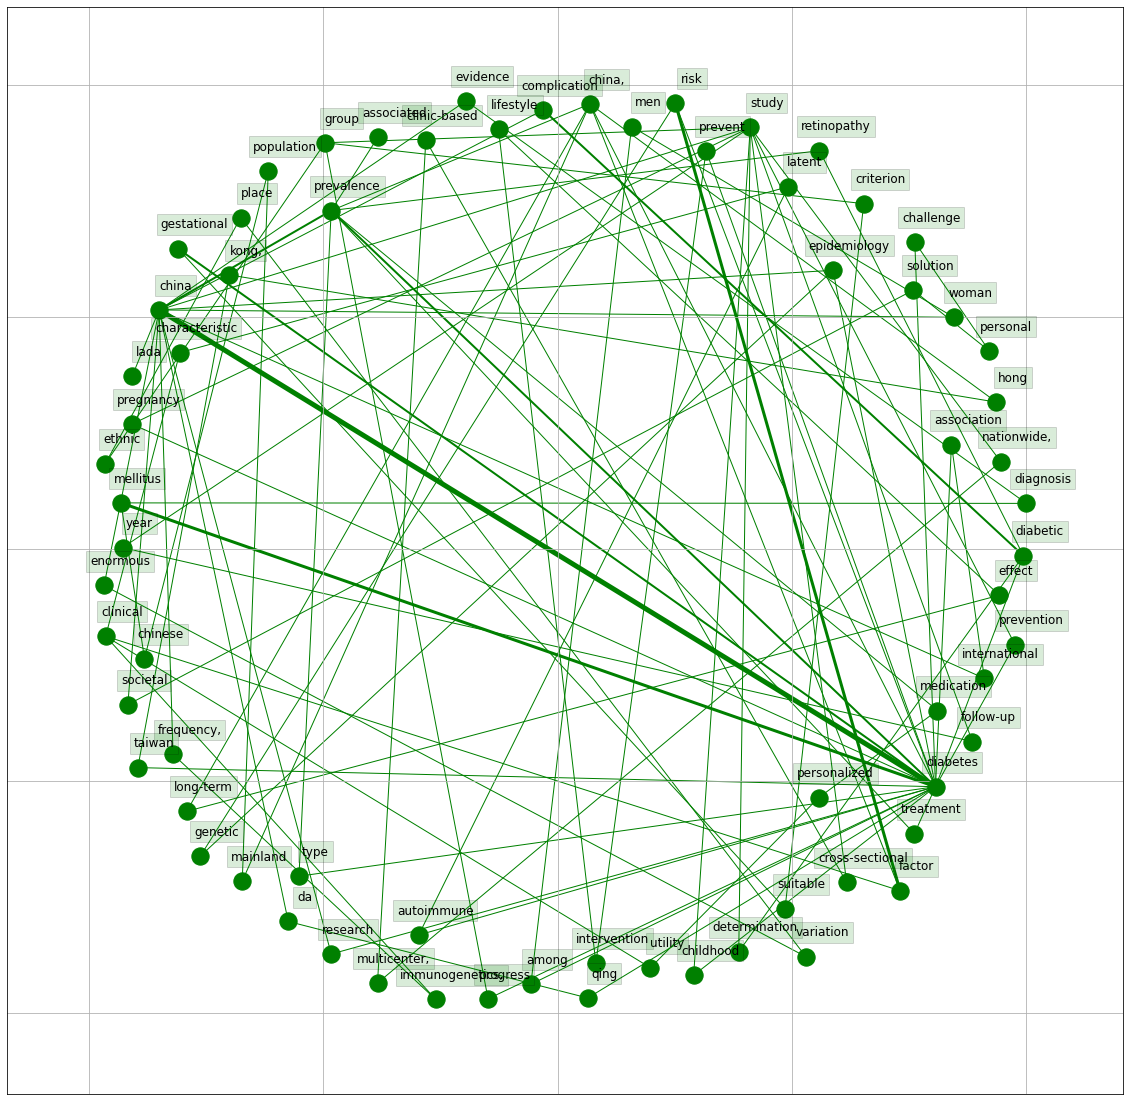

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='green',
                 node_color='green',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.15),
            horizontalalignment='center', fontsize=12)
plt.show()

In [36]:
import igviz as ig

In [37]:
import os

new_path = "figures/title_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [38]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/title_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/title_bigram.html")

<ipython-input-38-360256bff3c0>:1: DeprecationWarning: Argument `titlefont_size` is deprecated and will be removed in 0.6.0.
  fig = ig.plot(


## 2.2. Abstract

In [39]:
df_Abstract = df['Abstract'].str.lower()

In [40]:
Abstract = ('. '.join(list(df_Abstract.values)))
Abstract = regex.sub(r'\b[0-9]+\b\W*', '', Abstract)
Abstract = regex.sub(r'(?:^| )\w(?:$| )', ' ', Abstract)
Abstract =Abstract.replace(":"," ")
Abstract =Abstract.replace("."," ")
Abstract =Abstract.replace("?"," ")
Abstract =Abstract.replace("("," ")
Abstract =Abstract.replace(")"," ")
Abstract =Abstract.replace('"'," ")
Abstract =Abstract.replace(','," ")
Abstract

"the people’s republic of china  herein referred to as china  has witnessed one of the most dramatic rises in diabetes prevalence anywhere in the world  the latest epidemiological study suggests that approximately of the population has diabetes  with significant proportion remaining undiagnosed  risk factors for diabetes in the chinese population are similar to those in other populations  though gestational diabetes and young-onset diabetes is becoming increasingly common  data on the prevalence of diabetic complications remain limited  though cardio–renal complications account for significant morbidity and mortality  other diabetes-related comorbidities are becoming increasingly common  with cancer emerging as major cause of mortality among individuals with diabetes  there are many challenges and obstacles that impede effective diabetes prevention and the delivery of care  though much progress has occurred over recent years  lessons learnt from how china has responded to the challenge

In [41]:
def remove_url(txt):
    url_pattern = regex.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url


def stem_tokens(tokens):
    stemmer = nltk.stem.PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


def lemmatize_tokens(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [42]:
text_no_urls = remove_url(Abstract)
text_no_urls = text_no_urls.encode('utf-8', errors='ignore').decode('utf-8')
words_in_text = text_no_urls.split()

In [43]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
lemmatizer = WordNetLemmatizer()
words_nsw= [lemmatizer.lemmatize(w) for w in words_in_text]
words_nsw = [
    word for word in words_nsw if word not in string.punctuation]
words_nsw

['the',
 'people’s',
 'republic',
 'of',
 'china',
 'herein',
 'referred',
 'to',
 'a',
 'china',
 'ha',
 'witnessed',
 'one',
 'of',
 'the',
 'most',
 'dramatic',
 'rise',
 'in',
 'diabetes',
 'prevalence',
 'anywhere',
 'in',
 'the',
 'world',
 'the',
 'latest',
 'epidemiological',
 'study',
 'suggests',
 'that',
 'approximately',
 'of',
 'the',
 'population',
 'ha',
 'diabetes',
 'with',
 'significant',
 'proportion',
 'remaining',
 'undiagnosed',
 'risk',
 'factor',
 'for',
 'diabetes',
 'in',
 'the',
 'chinese',
 'population',
 'are',
 'similar',
 'to',
 'those',
 'in',
 'other',
 'population',
 'though',
 'gestational',
 'diabetes',
 'and',
 'young-onset',
 'diabetes',
 'is',
 'becoming',
 'increasingly',
 'common',
 'data',
 'on',
 'the',
 'prevalence',
 'of',
 'diabetic',
 'complication',
 'remain',
 'limited',
 'though',
 'cardio–renal',
 'complication',
 'account',
 'for',
 'significant',
 'morbidity',
 'and',
 'mortality',
 'other',
 'diabetes-related',
 'comorbidities',
 'a

In [45]:
stop_words = stopwords.words('english')
stop_words.extend([',','survey',':','A','on','in','into','the','for','review','.','SOK:','Sok:','(sok).'])
words_nsw = [word for word in words_nsw if not word in stop_words]
words_nsw = [ele for ele in words_nsw if len(ele) < 20]
words_nsw = [word for word in words_nsw if not word in ['An','SOK','How','sok','e','g','drb','ha']]
words_nsw

['people’s',
 'republic',
 'china',
 'herein',
 'referred',
 'china',
 'witnessed',
 'one',
 'dramatic',
 'rise',
 'diabetes',
 'prevalence',
 'anywhere',
 'world',
 'latest',
 'epidemiological',
 'study',
 'suggests',
 'approximately',
 'population',
 'diabetes',
 'significant',
 'proportion',
 'remaining',
 'undiagnosed',
 'risk',
 'factor',
 'diabetes',
 'chinese',
 'population',
 'similar',
 'population',
 'though',
 'gestational',
 'diabetes',
 'young-onset',
 'diabetes',
 'becoming',
 'increasingly',
 'common',
 'data',
 'prevalence',
 'diabetic',
 'complication',
 'remain',
 'limited',
 'though',
 'cardio–renal',
 'complication',
 'account',
 'significant',
 'morbidity',
 'mortality',
 'diabetes-related',
 'comorbidities',
 'becoming',
 'increasingly',
 'common',
 'cancer',
 'emerging',
 'major',
 'cause',
 'mortality',
 'among',
 'individual',
 'diabetes',
 'many',
 'challenge',
 'obstacle',
 'impede',
 'effective',
 'diabetes',
 'prevention',
 'delivery',
 'care',
 'though',
 

In [46]:
bigram = list(nltk.bigrams(words_nsw))
bigram_counts = collections.Counter(bigram).most_common(100)

In [47]:
abstract_bigram=pd.DataFrame(bigram_counts)
abstract_bigram.columns = ['bigram', 'counts']
abstract_bigram = abstract_bigram.sort_values(by=['counts'], ascending=False)
abstract_bigram.head(25)

bigram  counts
0      (prevalence, diabetes)      12
1        (glucose, tolerance)      11
2              (risk, factor)      10
3           (mainland, china)      10
4         (impaired, glucose)      10
5     (diabetic, retinopathy)       8
6            (type, diabetes)       7
7           (diabetes, china)       7
8   (lifestyle, intervention)       7
9       (chinese, population)       6
12     (confidence, interval)       5
13       (physical, activity)       5
11        (iadpsg, criterion)       5
10       (diabetes, mellitus)       5
24             (diabetes, wa)       4
31            (gdm, mainland)       4
30          (prevalence, gdm)       4
29          (incidence, rate)       4
28      (intervention, group)       4
27           (control, group)       4
26     (active, intervention)       4
25             (among, woman)       4
23    (diabetes, prediabetes)       4
21             (kong, taiwan)       4
20               (hong, kong)       4

In [48]:
print(abstract_bigram.head(90).to_latex(index=False)) 

\begin{tabular}{lr}
\toprule
                      bigram &  counts \\
\midrule
      (prevalence, diabetes) &      12 \\
        (glucose, tolerance) &      11 \\
              (risk, factor) &      10 \\
           (mainland, china) &      10 \\
         (impaired, glucose) &      10 \\
     (diabetic, retinopathy) &       8 \\
            (type, diabetes) &       7 \\
           (diabetes, china) &       7 \\
   (lifestyle, intervention) &       7 \\
       (chinese, population) &       6 \\
      (confidence, interval) &       5 \\
        (physical, activity) &       5 \\
         (iadpsg, criterion) &       5 \\
        (diabetes, mellitus) &       5 \\
              (diabetes, wa) &       4 \\
             (gdm, mainland) &       4 \\
           (prevalence, gdm) &       4 \\
           (incidence, rate) &       4 \\
       (intervention, group) &       4 \\
            (control, group) &       4 \\
      (active, intervention) &       4 \\
              (among, woman) &       4

In [49]:
print(abstract_bigram.head(25).to_markdown(index=False))

| bigram                        |   counts |
|:------------------------------|---------:|
| ('prevalence', 'diabetes')    |       12 |
| ('glucose', 'tolerance')      |       11 |
| ('risk', 'factor')            |       10 |
| ('mainland', 'china')         |       10 |
| ('impaired', 'glucose')       |       10 |
| ('diabetic', 'retinopathy')   |        8 |
| ('type', 'diabetes')          |        7 |
| ('diabetes', 'china')         |        7 |
| ('lifestyle', 'intervention') |        7 |
| ('chinese', 'population')     |        6 |
| ('confidence', 'interval')    |        5 |
| ('physical', 'activity')      |        5 |
| ('iadpsg', 'criterion')       |        5 |
| ('diabetes', 'mellitus')      |        5 |
| ('diabetes', 'wa')            |        4 |
| ('gdm', 'mainland')           |        4 |
| ('prevalence', 'gdm')         |        4 |
| ('incidence', 'rate')         |        4 |
| ('intervention', 'group')     |        4 |
| ('control', 'group')          |        4 |
| ('active

In [50]:
abstract_bigram.to_csv("abstract_bigram.csv")

In [51]:
# Create dictionary of bigrams and their counts
d = abstract_bigram.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=v/10000)
G.remove_nodes_from(["pfv", "tag"])

In [52]:
G = nx.Graph()
for edge in bigram_counts:
    link = edge[0]
    count = edge[1]
    
    G.add_edge(link[0], link[1], weight=count/10)

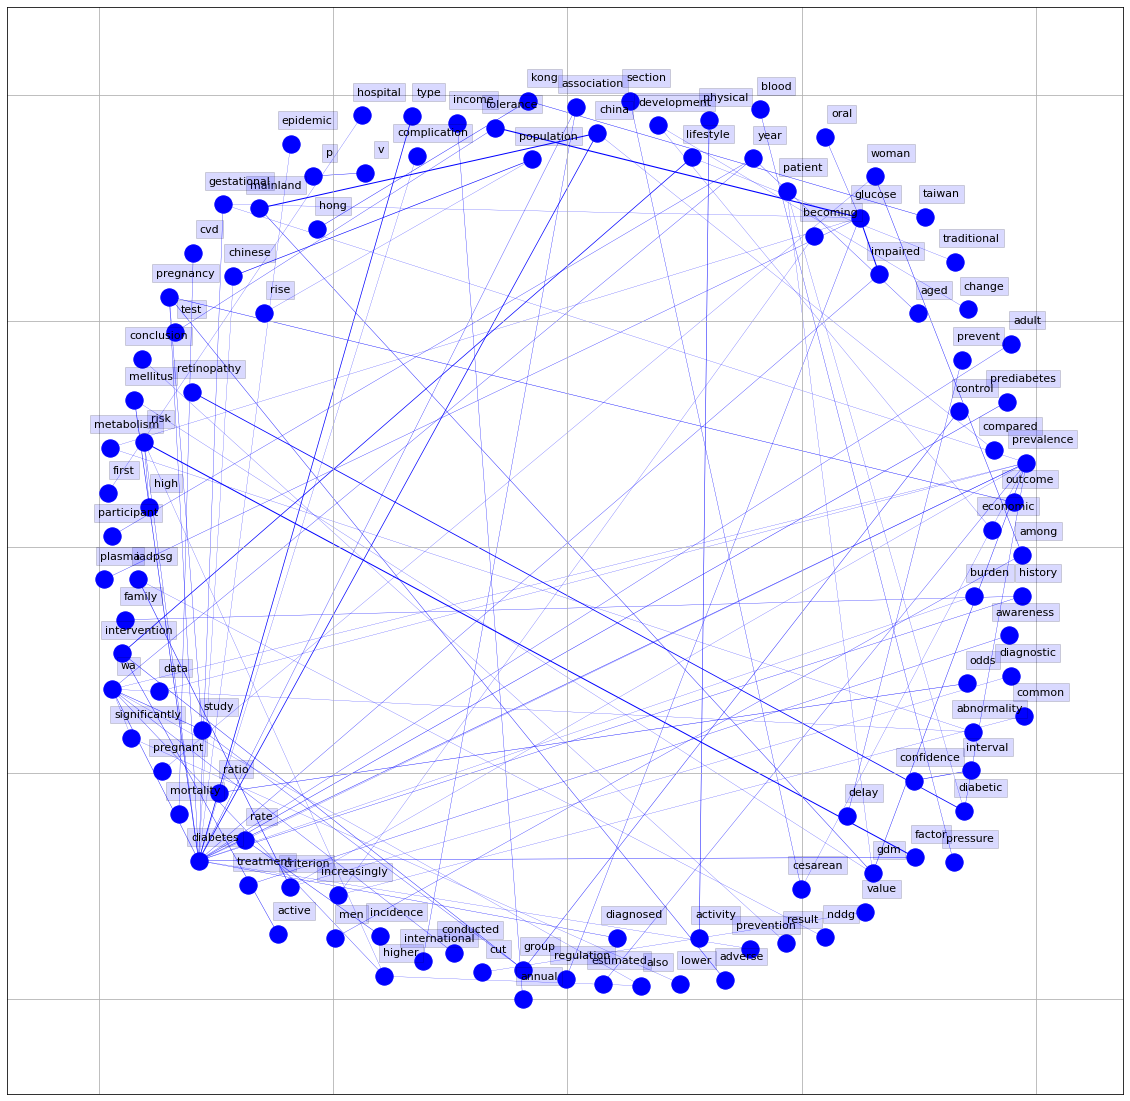

In [53]:
fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=10)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]


# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='blue',
                 node_color='blue',
                 with_labels = False,
                 ax=ax)
plt.grid(None)
# Create offset labels
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.15),
            horizontalalignment='center', fontsize=11)
    
plt.show()

In [54]:
import os

new_path = "figures/Abstract_bigram.html"
os.makedirs(os.path.dirname(new_path), exist_ok=True)

In [55]:
fig = ig.plot(
    G,
    node_opacity=0.8,
)
fig.update_layout(
    dict(
        width=800,
        height=600,
    )
)

with open('figures/Abstract_bigram.html', 'w') as f:
    f.write(fig.to_html())

fig.show()
fig.write_html("figures/Abstract_bigram.html")

<ipython-input-55-017664b3c192>:1: DeprecationWarning:

Argument `titlefont_size` is deprecated and will be removed in 0.6.0.

